# Predicting Spotify Top Hits: A Machine Learning Approach to Song Popularity

## Introduction:


Music is a huge part of modern culture, with people across the world able to band together under a familiar tune or make the day-in-day-out a bit less tedious. Music is always in high demand, constantly being created and acting as one of the largest sources of entertainment. Our dataset features the top music hits of the 00’s and 10’s. We aim to classify tracks and help separate the most popular tracks from background music. 


For this project, we will create several regression models to predict the popularity of tracks in our dataset.  There are certain features that greatly influence a song’s popularity, such as an artist’s following or the genre, but we want to discover if these surface-level elements are truly what dictate a certified banger or if it's the underlying features that are less obvious to listeners.


As we explore the different features and machine-learning models we hope to answer some of these guiding questions: 

   1) What elements have the strongest impact in propelling songs to the top of the charts?
   
   2) What types of models best fit with our dataset and what metrics will be used to gain the most insight into our 
      models?
      
   3) How do different feature selection methods impact model performance? What are the optimal features to place in our
      model?
 


## Exploring our Dataset:


Our data comes from the “Top Hits Spotify from 2000-2019” [dataset](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data
) on Kaggle, collected by Mark Koverha. The data consists of roughly 1,900 entries across 18 features and is 254.99 kB in size. The first two columns identify variables, giving the artist’s name and song name. There are several variables that people can immediately identify, such as release year or genre, but 11 of the variables give numerical values to elements of the song, such as “acousticness” or “liveness,” which are much harder to quantify. 


## Pre-Processing the Data:

In [62]:
# Import all necessary Python libraries and modules
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load in dataset
df = pd.read_csv("dataset.csv");
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [63]:
df.shape # 2000 songs and 18 features

(2000, 18)

In [64]:
df.dtypes # match as expected

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [65]:
df.isna().sum() # No Null values

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [66]:
df.duplicated().sum() # 59 Duplicates in our dataset

59

In [67]:
df.drop_duplicates(inplace=True) # Dropping all 59 duplicate entries b/c we have a large set of entires in our dataset (1900+)

In [68]:
df.shape # 1941 Songs left after dropping duplicates

(1941, 18)

In [69]:
df.drop(columns=["key", "song", "mode"], inplace=True) # Drop irrelevant columns in the dataset

In [70]:
# Split genre column into multiple values and hot encode the newly created columns (Used ChatGPT-4 for assistance on creating the Lamda functions)
df['genre'] = df['genre'].str.split(r'\s*,\s*')

all_genres = set([genre for genres in df['genre'] for genre in genres])

for genre in all_genres:
    df[genre] = df['genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original Genre column after hot encoding
df = df.drop(columns=['genre'])




In [71]:
df.columns

Index(['artist', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'metal', 'set()',
       'country', 'rock', 'blues', 'jazz', 'pop', 'Dance/Electronic',
       'Folk/Acoustic', 'classical', 'latin', 'R&B', 'hip hop',
       'World/Traditional', 'easy listening'],
      dtype='object')

In [72]:
df = df[df["set()"] != 1] # filters any song that has a genre set to set() b/c there is no set() genre


In [73]:
df = df.drop(columns=['set()']) # Drops the set() column

In [74]:
# Hot encodes artist features that will be used in our models
df = pd.get_dummies(df, columns=["artist"], prefix="artist")

In [75]:
# Lets standardize the data to ensure that our features are all on the same scale
standardized_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns = df.columns)
standardized_df.head()

,duration_ms,explicit,year,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,artist_alt-J,artist_benny blanco,artist_blackbear,artist_blink-182,artist_fun.,artist_girl in red,artist_iann dior,artist_iio,artist_t.A.T.u.,artist_will.i.am
0,-0.449266,-0.62174,-1.619698,0.804072,0.597047,0.737144,0.034022,-0.627735,1.003101,-0.172803,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
1,-1.574732,-0.62174,-1.789768,0.896804,-1.656038,1.149391,0.304838,-0.574844,-0.682162,-0.173005,...,-0.022834,-0.022834,-0.022834,43.794977,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
2,0.556032,-0.62174,-1.789768,0.294046,-0.980823,-1.474598,-1.800428,-0.780186,0.264308,-0.173005,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
3,-0.108951,-0.62174,-1.619698,0.850438,-0.824458,1.254089,0.745045,-0.597659,-0.589086,-0.172851,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703
4,-0.719823,-0.62174,-1.619698,0.247680,-0.376684,1.352244,0.362503,-0.545805,-0.504735,-0.161118,...,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.022834,-0.0323,-0.022834,-0.022834,-0.045703


## Data Visualization / Understanding:

#### General Distribution of Song Genres

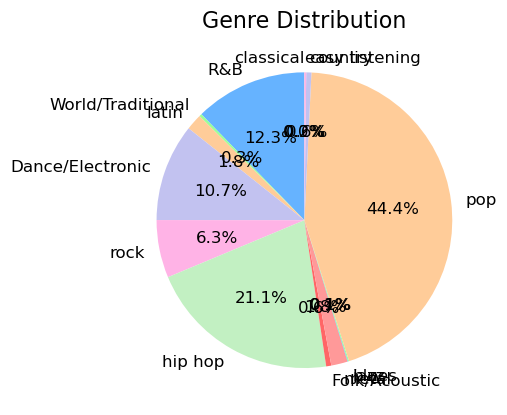

In [76]:
mylabels = ['classical', 'R&B',
       'World/Traditional', 'latin', 'Dance/Electronic', 'rock', 'hip hop',
       'Folk/Acoustic', 'metal', 'jazz', 'blues', 'pop', 'country',
       'easy listening']

# Calculate the total value for each genre
y = df[['classical', 'R&B',
       'World/Traditional', 'latin', 'Dance/Electronic', 'rock', 'hip hop',
       'Folk/Acoustic', 'metal', 'jazz', 'blues', 'pop', 'country',
       'easy listening']].sum()

# Creating and changing pie chart arguments
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ff6666']
plt.pie(y, labels=mylabels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=colors)
plt.title("Genre Distribution", fontsize=16)
plt.show()

#### How Strongly Correlated are our Features?

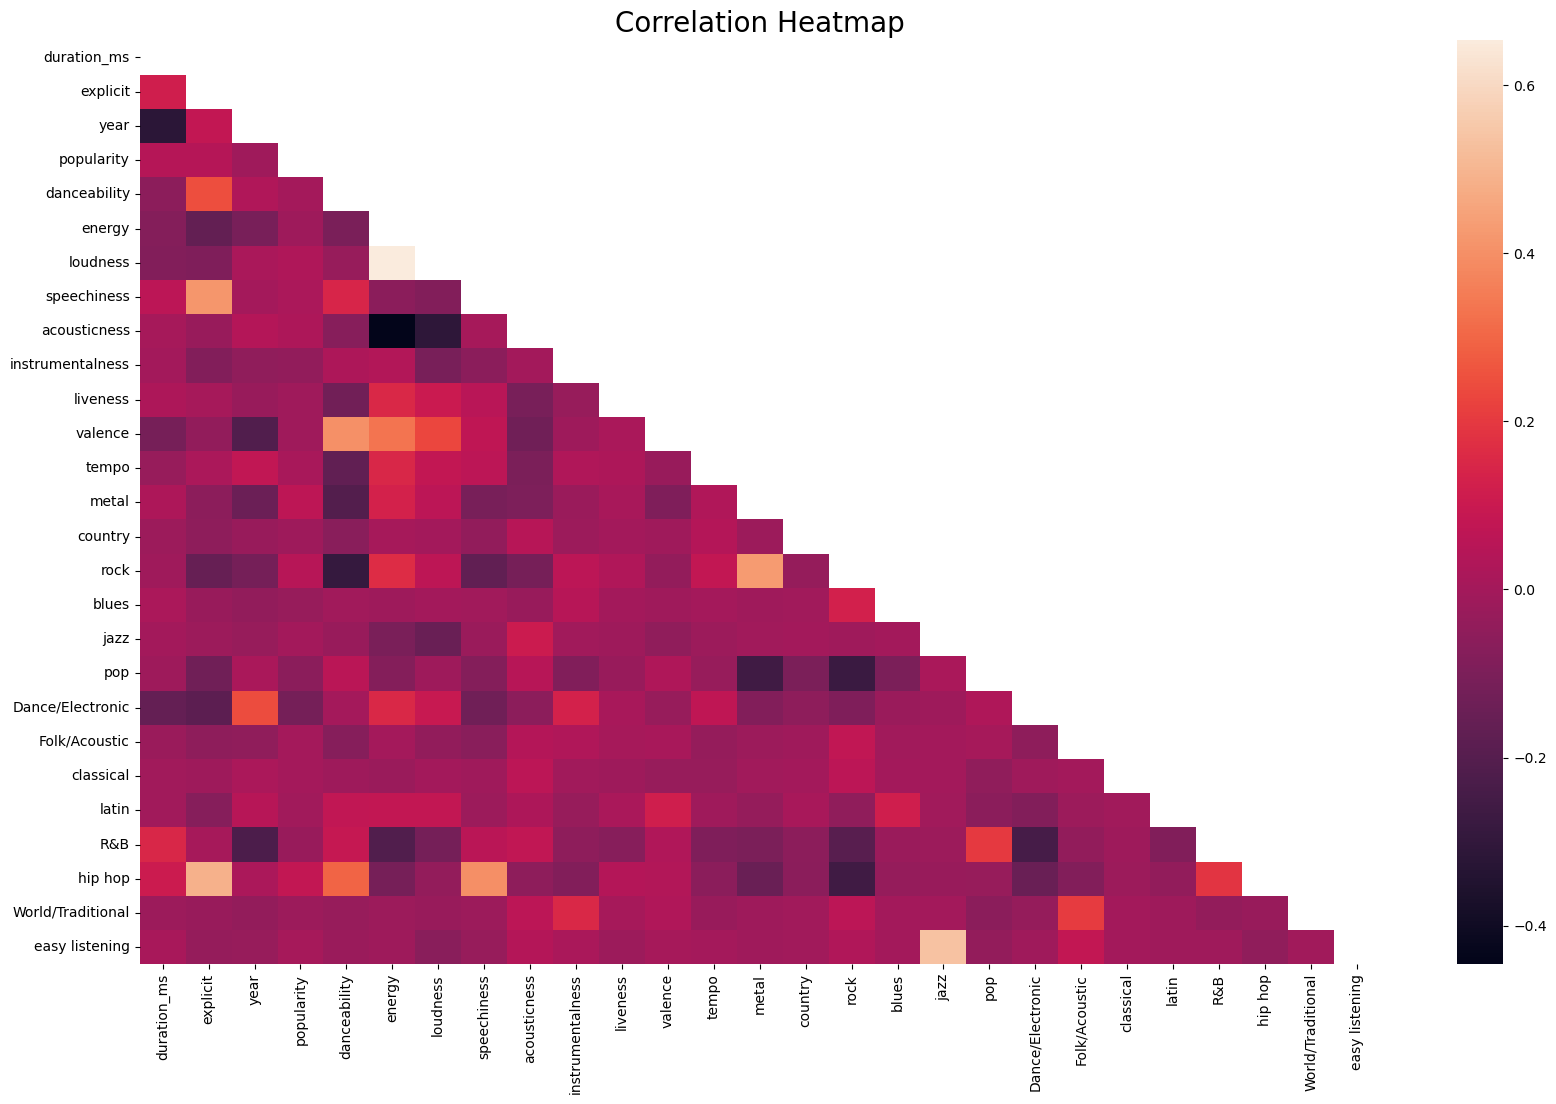

In [77]:
# Get the correlations
correlation_columns = [col for col in standardized_df.columns if not col.startswith("artist_")] # Excludes columns that contain artist_names as they won't have any correlations with any features in our dataset
correlation_df = df[correlation_columns]
corr = correlation_df.corr()

# Create a mask so that way we only see the lower half of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 12))

sns.heatmap(corr, mask=mask)

plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(['popularity'] , axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("y_test values:")
print(y_test)

y_test values:
1604     1
1430    70
633     65
1415    69
425     63
        ..
196     56
1614    67
448     68
1518    70
1409    49
Name: popularity, Length: 384, dtype: int64


## Modeling:

In [79]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Model training complete.")

Model training complete.


In [80]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual  Predicted
1604       1      30.22
1430      70      40.59
633       65      65.63
1415      69      49.44
425       63      59.15
...      ...        ...
196       56      59.83
1614      67      69.49
448       68      60.25
1518      70      69.43
1409      49      58.06

[384 rows x 2 columns]


In [81]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred2 = model2.predict(X_test_scaled)

print("Model training complete.")

Model training complete.


In [82]:
comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
print(comparison2)

      Actual     Predicted
1604       1  9.928979e+00
1430      70  5.080398e+01
633       65  7.892898e+01
1415      69  4.374148e+01
425       63  6.392898e+01
...      ...           ...
196       56 -1.130428e+14
1614      67  7.883523e+01
448       68  7.917898e+01
1518      70  6.871023e+01
1409      49 -2.125990e+14

[384 rows x 2 columns]


In [83]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
model3 = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model3.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred3 = model.predict(X_test_scaled)

print("Model training complete.")

Model training complete.


In [84]:
comparison3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
print(comparison3)

      Actual  Predicted
1604       1      30.22
1430      70      40.59
633       65      65.63
1415      69      49.44
425       63      59.15
...      ...        ...
196       56      59.83
1614      67      69.49
448       68      60.25
1518      70      69.43
1409      49      58.06

[384 rows x 2 columns]


## Evaluation:


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Model Evaluation Metrics:
Mean Squared Error: 470.8153927976707
Mean Absolute Error: 13.65773220486111
R² Score: 0.061516839674370605


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred2 = model2.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Model Evaluation Metrics:
Mean Squared Error: 2.0876801323154806e+29
Mean Absolute Error: 147243303134094.4
R² Score: -4.161403128054554e+26


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred3 = model3.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Model Evaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Model Evaluation Metrics:
Mean Squared Error: 716.4407552083334
Mean Absolute Error: 17.037760416666668
R² Score: -0.42809176254554226


## Conclusion:

Going back to the introduction, these were the three questions we were looking to answer:

1) What elements have the strongest impact in propelling songs to the top of the charts?
        
2) What types of models best fit with our dataset and what metrics will be used to gain the most insight into our models?
    
3) How do different feature selection methods impact model performance? What are the optimal features to place in ourmodel?

So, was the data above able to answer these questions?

#### Question 1
The best way to answer the first question would be to find the correlation between popularity and other elements in the heatmap shown above. These elements seem to have the highest correlation to popularity:

- Two genres had the highest scores, Pop and Dance/Electronic
- Instrumentalness, Danceability, and Energy seem to have the top correlation scores. 

As mentioned briefly in the introduction, it's difficult to use arbitrary elements, such as loudness or danceability, to quantify what makes a song popular. Each person hears music differently, and something that one person likes may be hated by another. However, using the methods above, the dataset showed these elements contribute the most to popularity. Surface level features like a familiar artist or popular genre may help the song get recognized, but these elements do not grant music it's staying power months or even years down the road.

One additional note I wanted to point out was the amount of correlation between genres. Whenever any genre is either mixed or classified as multiple genres, the correlation between those increases. Something to keep in mind.

#### Question 2
Of the created models, the Random Forest Regression model easily performed the best, able to predict within 14 points on average. Of the metrics used for analysis, the Mean Absolute Error (MAE) shows the clearest evidence that this model accurately predicts. Of the three models, the linear regression proved the least useful.

#### Question 3
While models were trained with various selections of features, we found that more data was always better when training our models. Even if the model did not favor the feature as a strong predictor, each variable had some weight with which it could impact the outcomes.



Were this research to be persued further, we would've liked to gain a more robust dataset, focusing on negatively reviewed music, instead of just the popular items. This may be able to give us even further insight into not only what elements to promote, but what elements could be deemed a waste of time.

## Impact:

An impact of this project could be a shift in how users of Spotify view genres of music. Some may see the overlap in correlation between genres and think that maybe not all songs advertised as a single genre are the same, and broaden their horizons regarding their listening. Others, may see the overlap and assume that everything is the same, and not listen to any other genre than pop. The beauty of music is in the variety, and the fact that there's so many options to choose from allows people to find something they really like, and only listen to that.

In theory, there could be no correlation between elements of songs, and how things are determined popular. It could just be how good someone is at creating music, making something catchy, and getting noticed at the right place at the right time. The impact of this could be null and void due to that, because modeling and machine learning sometimes isn't able to keep up with the randomness of humanity.

This could also go the other direction with the last point, and cause artists to only focus on the things that make their songs the most popular. If a song doesn't correlate to these arbitrary values, it will never be popular, and thus, never be made. That would be catastrophic for a creative industry, and could lead to a trend that kills all creativity at some point. The likelyhood of this happening is near-zero, but still possible.

[github](https://github.com/ryanshz/dm-final)